# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


## Data Dictionary
You are provided with 3 files - train.csv, test.csv and sample_submission.csv


### Training set

train.csv contains the user and video information along with the engagement score

#### row_id 

Unique identifier of the row

#### user_id

Unique identifier of the user

#### category_id

Category of the video

#### video_id

Unique identifier of the video

#### age

Age of the user

#### gender

Gender of the user (Male and Female)

#### profession

Profession of the user (Student, Working Professional, Other)

#### followers

No. of users following a particular category

#### views

Total views of the videos present in the particular category

#### engagement_score

Engagement score of the video for a user

 

### Test set

test.csv contains only the user and video information, and you have to predict the engagement score

#### row_id 

Unique identifier of the row

#### user_id

Unique identifier of the user

#### category_id

Category of the video

#### video_id

Unique identifier of the video

#### age

Age of the user

#### gender

Gender of the user (Male and Female)

#### profession

Profession of the user (Student, Working Professional, Other)

#### followers

No. of users following a particular category

#### views

Total views of the videos present in the particular category

## Evaluation metric

The evaluation metric for this hackathon is r2 score.

## Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the "user" level.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from xgboost import XGBRegressor

# Misc

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
import os

In [2]:
# Import Data
df_train = pd.read_csv("train_0OECtn8.csv")
df_test = pd.read_csv("test_1zqHu22.csv")

In [3]:
df_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
# Shape of the data
print('No of Rows: ',df_train.shape[0],'\nNo of columns: ',df_train.shape[1]) 

No of Rows:  89197 
No of columns:  10


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [6]:
df_train.describe()

# Engagement score minimum = 0 and maximum = 5

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


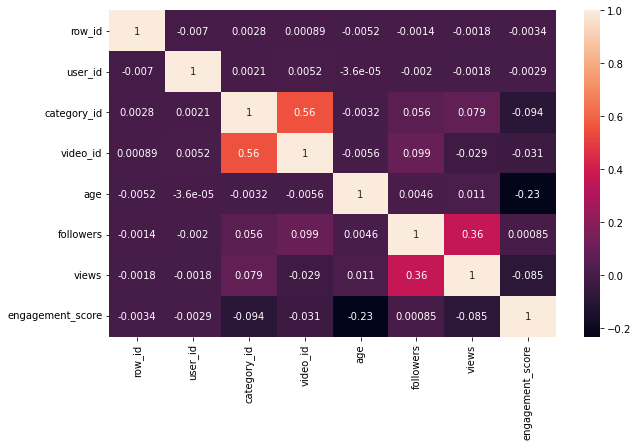

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# Engagement score highly correlated to age.

In [8]:
# Lets check the details of data 
def details(dataFrame):
    df = pd.DataFrame()
    df['Null_Values'] = dataFrame.isnull().sum()
    df['Data Type'] = dataFrame.dtypes
    df['Unique Values'] = dataFrame.nunique()
    return df

In [9]:
details(df_train)

# No null values present in the data set. We can continue with our development.

,Null_Values,Data Type,Unique Values
row_id,0,int64,89197
user_id,0,int64,27734
category_id,0,int64,47
video_id,0,int64,175
age,0,int64,58
gender,0,object,2
profession,0,object,3
followers,0,int64,17
views,0,int64,43
engagement_score,0,float64,229


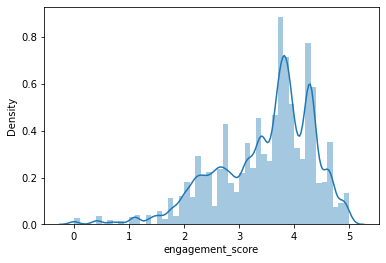

In [10]:
sns.distplot(df_train['engagement_score'])
plt.show()

# We can see slightly left skewed data for engagement score.

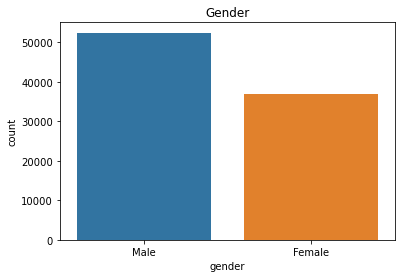

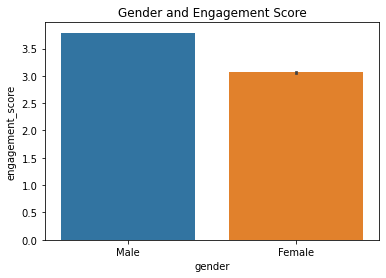

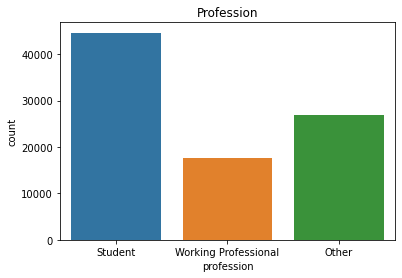

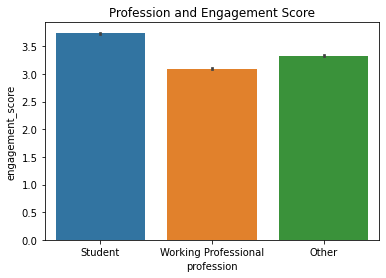

In [11]:
sns.countplot(df_train.gender)
plt.title('Gender')
plt.show()

sns.barplot(df_train.gender,df_train.engagement_score)
plt.title('Gender and Engagement Score')
plt.show()


sns.countplot(df_train.profession)
plt.title('Profession')
plt.show()

sns.barplot(df_train.profession,df_train.engagement_score)
plt.title('Profession and Engagement Score')
#plt.savefig('')
plt.show()

# In the data there are more number of males than females, also the average engagement score of male is higher than
# that of females.

# In the data there are more number of students as compared to working professionals and other professions
# due to which the average engagement score is higher for students

In [12]:
# Checking for the video_id having cardinality with categories, users, followers and viewers 

video = 1
print('Video "{}" has {} users watching'.format(video,df_train[df_train['video_id']==video]['user_id'].unique()))
users = df_train[df_train['video_id']==video]['user_id'].unique()
print('\n')

print('Video "{}" belongs to {} category'.format(video,df_train[df_train['video_id']==video]['category_id'].unique()))
print('\n')

print('Video "{}" has to {} followers'.format(video,df_train[df_train['video_id']==video]['followers'].unique()))
print('\n')

print('Video "{}" has to {} views'.format(video,df_train[df_train['video_id']==video]['views'].unique()))

Video "1" has [26687  9311 26268 ... 20371  2259 15046] users watching


Video "1" belongs to [ 1 19] category


Video "1" has to [360 230] followers


Video "1" has to [990 369] views


In [13]:
num_user_vid_train = pd.DataFrame(df_train.groupby(['video_id'])['user_id'].
                            unique()).reset_index().rename(columns={'user_id':'users'})
num_user_vid_train['num_users'] = [len(num_user_vid_train['users'][i]) for i in range(len(num_user_vid_train['users']))]

In [14]:
num_cat_vid_train = pd.DataFrame(df_train.groupby(['video_id'])['category_id'].
                           unique()).reset_index().rename(columns={'category_id':'categories'})
num_cat_vid_train['num_categories'] = [len(num_cat_vid_train['categories'][i]) for i in range(len(num_cat_vid_train['categories']))]

In [15]:
num_vid_cat_train = pd.DataFrame(df_train.groupby(['category_id'])['video_id'].
                           unique()).reset_index().rename(columns={'video_id':'videos'})
num_vid_cat_train['num_videos'] = [len(num_vid_cat_train['videos'][i]) for i in range(len(num_vid_cat_train['videos']))]

In [16]:
num_followers_cat_train = pd.DataFrame(df_train.groupby(['category_id'])['followers'].
                                 unique()).reset_index().rename(columns={'category_id':'categories'})
video = np.sort(df_train['video_id'].unique())
follow = {}
for i in video:
    temp_cat = num_cat_vid_train[num_cat_vid_train['video_id']==i]['categories'][i-1]
    follows = 0
    for j in temp_cat:
        temp_follow = num_followers_cat_train[num_followers_cat_train['categories']==j]['followers'][j-1][0]
        follows += temp_follow
    follow[i]= follows
    
follow_data_train = pd.DataFrame(data=follow.items()).rename(columns={0:'video_id',1:'followers'})

In [17]:
num_views_cat_train = pd.DataFrame(df_train.groupby(['category_id'])['views'].
                             unique()).reset_index().rename(columns={'category_id':'categories'})
video = np.sort(df_train['video_id'].unique())
view = {}
for i in video:
    temp_cat = num_cat_vid_train[num_cat_vid_train['video_id']==i]['categories'][i-1]
    views = 0
    for j in temp_cat:
        temp_view = num_views_cat_train[num_views_cat_train['categories']==j]['views'][j-1][0]
        views += temp_view
    view[i]= views
    
view_data_train = pd.DataFrame(data=view.items()).rename(columns={0:'video_id',1:'viewers'})

In [18]:
df_train_1 = pd.merge(df_train,num_user_vid_train,on='video_id', how='left')
df_train_2 = pd.merge(df_train_1,num_cat_vid_train,on='video_id', how='left')
df_train_3 = pd.merge(df_train_2,follow_data_train,on='video_id', how='left')
df_train_4 = pd.merge(df_train_3,view_data_train,on='video_id', how='left').rename(columns={'followers_y':'followers'}).drop(columns=['users','followers_x','categories','category_id', 'views'])

In [19]:
df_test_1 = pd.merge(df_test,num_user_vid_train,on='video_id', how='left')
df_test_2 = pd.merge(df_test_1,num_cat_vid_train,on='video_id', how='left')
df_test_3 = pd.merge(df_test_2,follow_data_train,on='video_id', how='left')
df_test_4 = pd.merge(df_test_3,view_data_train,on='video_id', how='left').rename(columns={'followers_y':'followers'}).drop(columns=['users','followers_x','categories','category_id', 'views'])

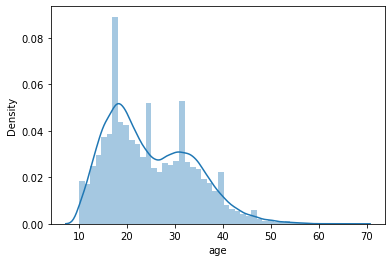

In [20]:
sns.distplot(df_train['age'])
plt.show()

In [21]:
# Binning the age column in Kid, teen, Adults

bins= [0,13,20,40,60,100]
labels = ['Kid','Teen','Young_Adult','Middle_Adult','Old_Adult']
df_train_4['Age_Group']= pd.cut(df_train_4['age'], bins=bins, labels=labels, right=False)
df_train_4['Age_Group']= pd.cut(df_train_4['age'], bins=bins, labels=labels, right=False)

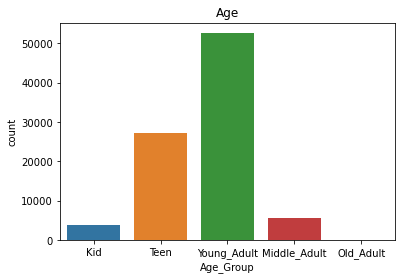

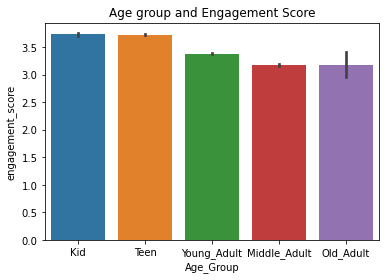

In [22]:
sns.countplot(df_train_4.Age_Group)
plt.title('Age')
plt.show()

sns.barplot(df_train_4.Age_Group,df_train.engagement_score)
plt.title('Age group and Engagement Score')
plt.show()

# In the data the number of Young adult that is the age group (20 - 39) is highest
# Average engagement score of kids is highest in terms of age.

In [23]:
df_train_5=pd.get_dummies(df_train_4,drop_first=True)
df_test_5=pd.get_dummies(df_test_4,drop_first=True)

In [24]:
df_train_5

,row_id,user_id,video_id,age,engagement_score,num_users,num_categories,followers,viewers,gender_Male,profession_Student,profession_Working Professional,Age_Group_Teen,Age_Group_Young_Adult,Age_Group_Middle_Adult,Age_Group_Old_Adult
0,1,19990,128,24,4.33,503,1,180,1000,1,1,0,0,1,0,0
1,2,5304,132,14,1.79,697,1,330,714,0,1,0,1,0,0,0
2,3,1840,24,19,4.35,555,1,180,138,1,1,0,1,0,0,0
3,4,12597,112,19,3.77,1337,1,220,613,1,1,0,1,0,0,0
4,5,13626,112,27,3.13,1337,1,220,613,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,32,25,3.91,740,1,340,662,1,0,0,0,1,0,0
89193,89194,20466,47,31,3.56,351,1,240,892,1,0,0,0,1,0,0
89194,89195,13655,97,25,4.23,669,1,270,462,1,1,0,0,1,0,0
89195,89196,24840,18,35,3.77,625,1,230,819,1,0,1,0,1,0,0


In [25]:
df_row_train = df_train_5['row_id']
df_train_5.drop(columns=['row_id', 'user_id', 'video_id', 'age', 'num_users',
       'num_categories'],inplace=True)
df_row_test = df_test_5['row_id']
df_test_5.drop(columns=['row_id', 'user_id', 'video_id', 'age', 'num_users',
       'num_categories'],inplace=True)

In [26]:
df_vif = df_train_5.drop(columns=['engagement_score'])

In [27]:
from   statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF Factor'] =[variance_inflation_factor(df_vif.values,i) for i in range(df_vif.shape[1])]
vif['Feature'] = df_vif.columns
vif

,VIF Factor,Feature
0,17.793221,followers
1,5.512927,viewers
2,2.362286,gender_Male
3,3.848044,profession_Student
4,1.676233,profession_Working Professional
5,4.960739,Age_Group_Teen
6,7.671817,Age_Group_Young_Adult
7,1.864954,Age_Group_Middle_Adult
8,1.007182,Age_Group_Old_Adult


In [28]:
# Split the data in Independent and Dependent features.

x = df_train_5.drop(columns='engagement_score')
y = df_train_5['engagement_score']

In [29]:
# Fitting the Ordinary Least Squares Model in order to check for the various hypothesis tests available.

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
mod_pred = model.predict(X)
residual = model.resid
model.summary()

# Durbin-Watson test signify that there is No or little Autocorellation present in the data.
# Jarque-Bera test signify that the data do not have a normal distribution.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       engagement_score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3561.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:59:27   Log-Likelihood:                -99783.
No. Observations:               89197   AIC:                         1.996e+05
Df Residuals:                   89187   BIC:                         1.997e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.8645      0.018    158.667      0.000       2.829       2.900
followers                           0.0006   4.66e-05     13.795      0.000       0.001       0.001
viewers                            -0.0003   9.93e-06    -25.390      0.000      -0.000      -0.000
gender_Male                         0.7102      0.005    140.860      0.000       0.700       0.720
profession_Student                  0.4065      0.008     53.658      0.000       0.392       0.421
profession_Working Professional    -0.2369      0.007    -32.454      0.000      -0.251      -0.223
Age_Group_Teen                      0.0116      0.013      0.894      0.371      -0.014       0.037
Age_Group_Young_Adult               0.0152      0.014      1.120      0.263      -0.011       0.042
Age_Group_Middle_Adult              0.0214      0.017      1.234      0.217      -0.013       0.055
Age_Group_Old_Adult                 0.2307      0.124      1.855      0.064      -0.013       0.474
==============================================================================
Omnibus:                     9128.555   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15407.936
Skew:                          -0.727   Prob(JB):                         0.00
Kurtosis:                       4.425   Cond. No.                     3.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Splitting the data in Train and Test for various Models.

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state  = 14)

In [31]:
# After the split Standardizing the data using Standard Scaler

# Standarscaler
scaler = StandardScaler()

# all columns to all_cols
all_cols = xtrain.columns

# fit scaler
xtrain[all_cols] = scaler.fit_transform(xtrain[all_cols])
xtest[all_cols] = scaler.transform(xtest[all_cols])

In [32]:
# Linear Regression
# create object of model
model_lr = LinearRegression()

# fit the model with the training data
model_lr.fit(xtrain,ytrain)

# predict
predict_train_lr = model_lr.predict(xtrain)
predict_test_lr = model_lr.predict(xtest)

# Accuracy Score on test dataset
print('Training R square is %1.4f' %r2_score( ytrain,predict_train_lr))
print('Testing R square is %1.4f' %r2_score( ytest,predict_test_lr))

Training R square is 0.2657
Testing R square is 0.2611


In [33]:
# Ridge Regression

# create object of model

model_ridge = Ridge()

# hyperparameters to search
alpha = [float(x) for x in np.linspace(0,1,11)]
tol = [0.1,0.01,0.001,0.0001]
random_state = [x for x in range(1,100,2)]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'alpha': alpha,
    'tol': tol,
    'random_state':random_state}

# Set up the random search with 2-fold cross validation
random_cv_ridge = RandomizedSearchCV(estimator=model_ridge,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = -1)


# fit the model with the training data
random_cv_ridge.fit(xtrain,ytrain)

# predict
predict_train_ridge = random_cv_ridge.predict(xtrain)
predict_test_ridge = random_cv_ridge.predict(xtest)

# Accuracy Score on test dataset
print('Training R square is %1.4f' %r2_score( ytrain,predict_train_ridge))
print('Testing R square is %1.4f' %r2_score( ytest,predict_test_ridge))

Training R square is 0.2657
Testing R square is 0.2611


In [34]:
# Gradient Boosting Regression

# create object of model
gbr = GradientBoostingRegressor()

# hyperparameters to search
loss = ['ls']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2']
random_state = [x for x in range(1,100,2)]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'random_state':random_state}

# Set up the random search with 2-fold cross validation
random_cv_gbr = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = -1)

# fit the model with the training data
random_cv_gbr.fit(xtrain,ytrain)

# predict
predict_train_gbr = random_cv_gbr.predict(xtrain)
predict_test_gbr = random_cv_gbr.predict(xtest)

# Accuracy Score on test dataset
print('Training R square is %1.4f' %r2_score( ytrain,predict_train_gbr))
print('Testing R square is %1.4f' %r2_score( ytest,predict_test_gbr))

Training R square is 0.3648
Testing R square is 0.3431


In [35]:
# XGBoost Regression

# create object of model
xgb = XGBRegressor()

# hyperparameters to search
learning_rate = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
random_state = [x for x in range(1,100,2)]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'random_state':random_state
}


# Set up the random search with 2-fold cross validation
random_cv_xgb = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = -1)


# fit the model with the training data
random_cv_xgb.fit(xtrain,ytrain)

# predict
predict_train_xgb = random_cv_xgb.predict(xtrain)
predict_test_xgb = random_cv_xgb.predict(xtest)

# Accuracy Score on test dataset
print('Training R square is %1.4f' %r2_score( ytrain,predict_train_xgb))
print('Testing R square is %1.4f' %r2_score( ytest,predict_test_xgb))

Training R square is 0.3659
Testing R square is 0.3405
